Clustering : K-Means

Importing the Essential Libraries and loading data :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("Ruspini.csv")
df.head()

,Unnamed: 0,x,y
0,1,4,53
1,2,5,63
2,3,10,59
3,4,9,77
4,5,13,49


In [29]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


Now, we check the data set information :

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


Check the missing and duplicates values :

In [31]:
df.isnull().sum()

x    0
y    0
dtype: int64

Data Visualization : In the case of unsupervised classification, the visualisation of the data allows for example to identify the number of clusters (i.e. similar groups).

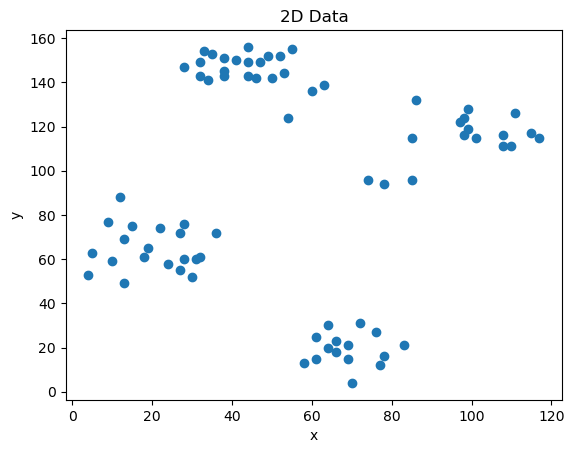

In [32]:
plt.scatter(df.x, df.y);
plt.ylabel('y')
plt.xlabel('x')
plt.title('2D Data')
plt.show()

The box plot allows outliers to be detected. Values outside the box plot are considered outliers. An outlier is a value or observation that is distant from the other observations made, i.e. it contrasts greatly with the measured values.

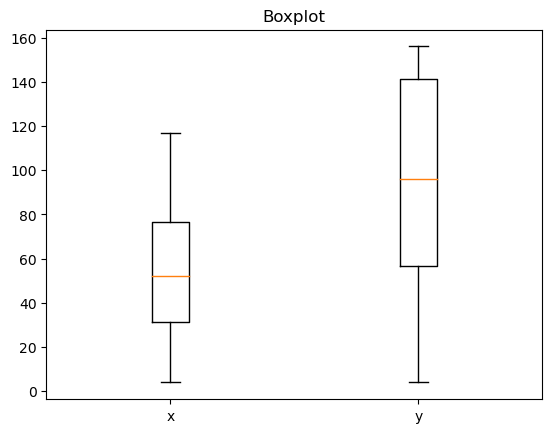

In [33]:
liste = [df['x'], df['y']]
plt.figure()
plt.title('Boxplot')
plt.boxplot(liste, labels = ['x', 'y'])
plt.show()

K-Means Model :

In [34]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

We can visualize again the scatterplot of the x and y data to observe the clusters and their centroid in blue :

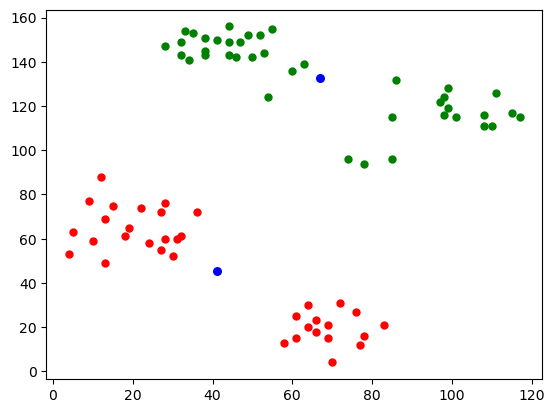

In [35]:
# Color list
colors = ["g.","r."]

for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Centroid graphic
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

The scatterplot above shows us that the choice of k = 2 is not optimal because some points are far from the other points of their cluster.
The number of clusters is generally not known a priori, but the choice of k is of great importance.

In order to find the optimal number of clusters, the elbow method is used to obtain the best partitioning of the data.

In [36]:
# Importing the cdist function from the scipy.spatial.distance package
from scipy.spatial.distance import cdist

# List of cluster numbers
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialization of the distortion list
distorsions = []

# Calculation of the distortions for the different models
for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster.fit(df)
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))

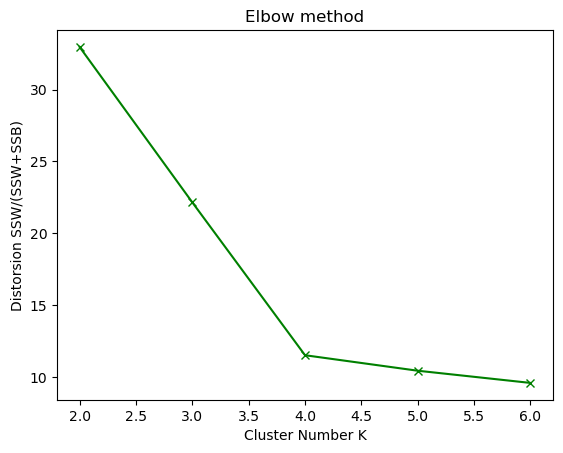

In [37]:
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Cluster Number K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Elbow method')
plt.show()

The resulting curve decreases strongly and changes its trajectory after k = 4. Thus, the optimal number of clusters is 4. So, we train again the model with K = 4.

In [38]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


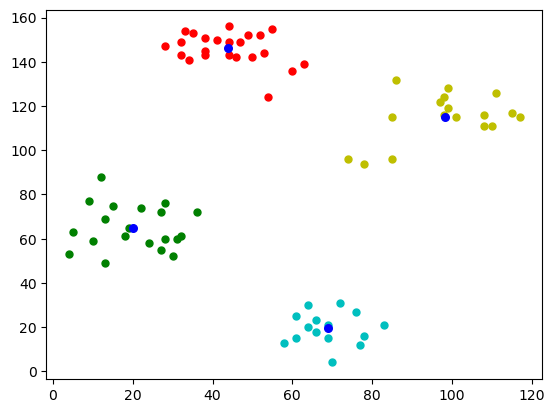

In [39]:
# Color list
colors = ["g.","r.","c.","y."]

for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

In unsupervised learning, the evaluation of a method is a delicate issue. We use the silhouette coefficient :

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(df, labels, metric='sqeuclidean')

0.9086095548482791

Hierarchical Ascending Classification (CAH) :

Importing the Essential Libraries and loading data :

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('fromage.txt', index_col = 0, sep = '\t' )

df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


Data Visualization :

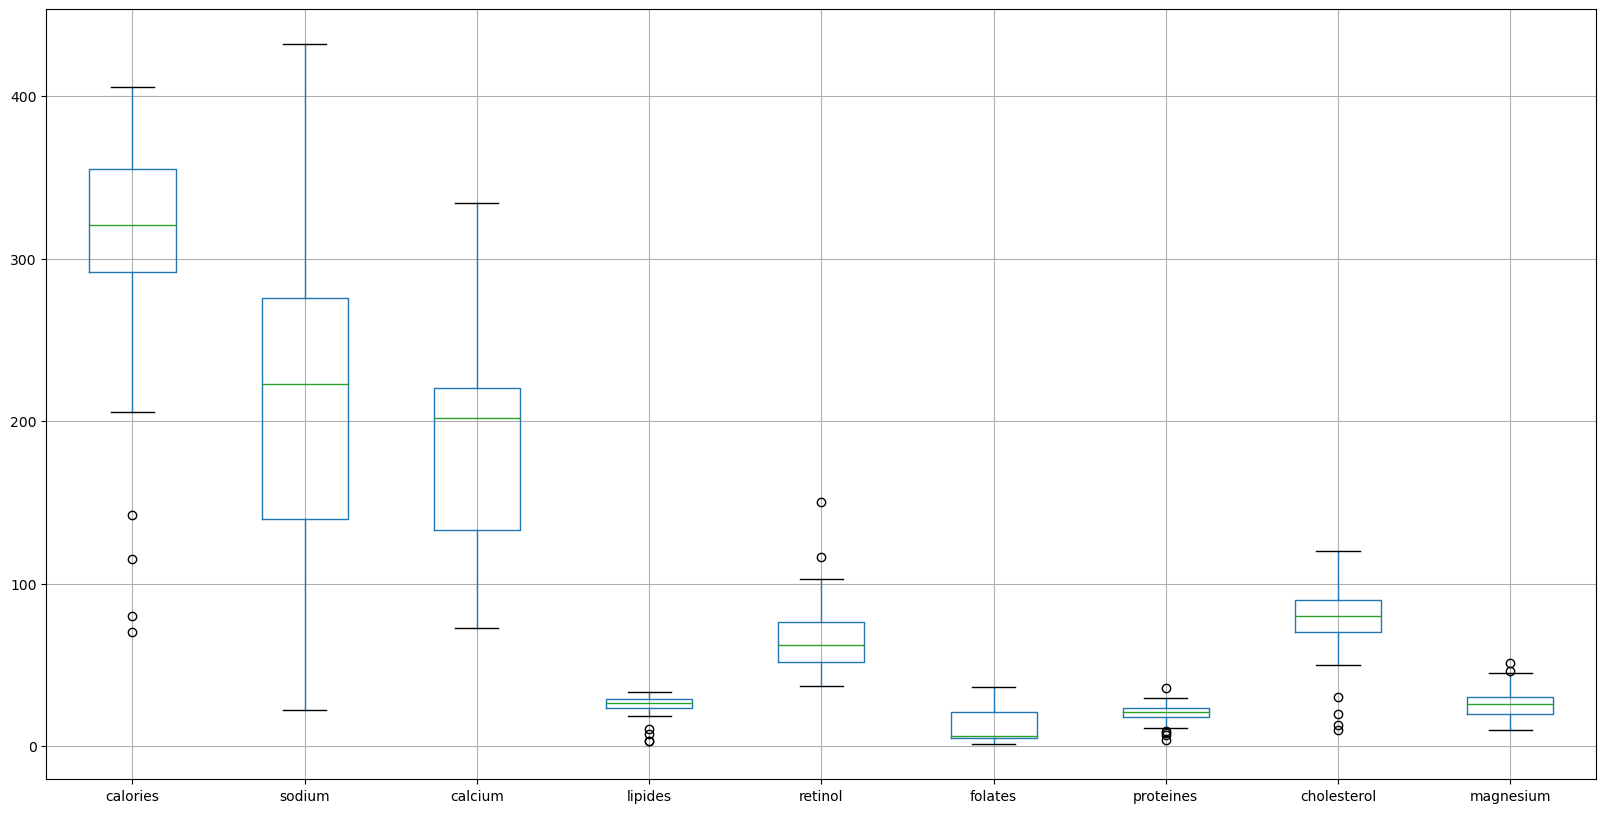

In [3]:
plt.figure(figsize=(20, 10))
df.boxplot(column = list(df.columns));

CAH Model :

In [43]:
cluster = AgglomerativeClustering(n_clusters = 4)
cluster.fit(df[ls_features])
labels = cluster.labels_

We will now draw a dendrogram. A dendrogram, or hierarchical tree, is a diagram that shows the different clusters obtained at each stage :

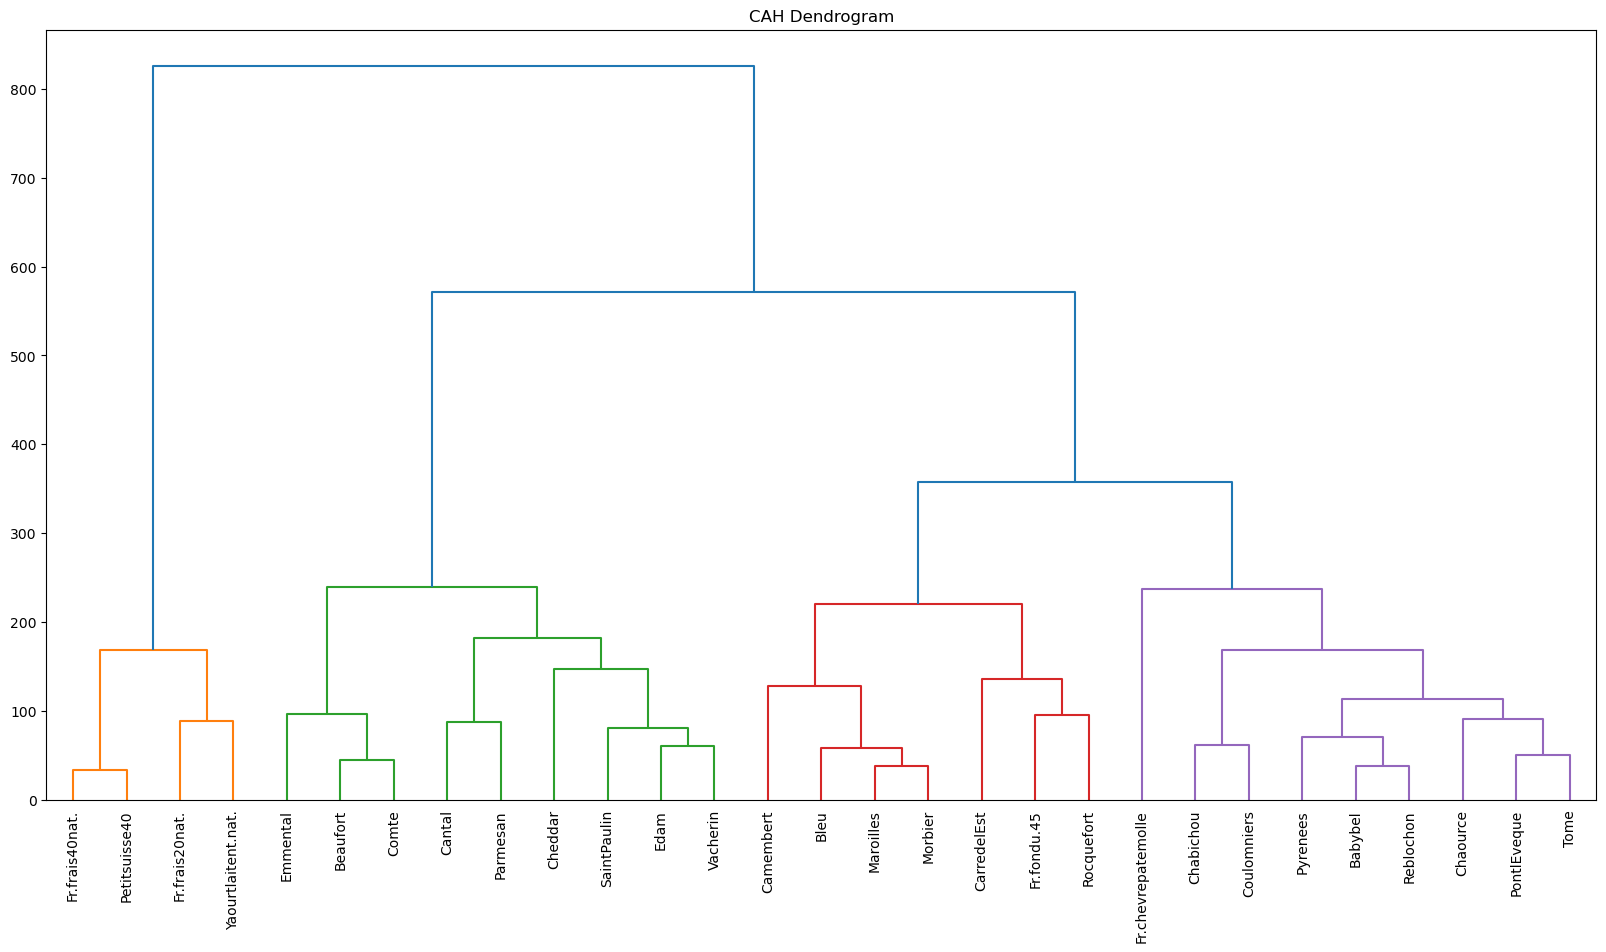

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 10))
Z = linkage(df, method = 'ward', metric = 'euclidean')


plt.title("CAH Dendrogram")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 290)
plt.show()

The dendrogram suggests a division into 2 groups.

To choose the optimal number of clusters, it is possible to train the CAH algorithm for different values of n_clusters and calculate the silhouette coefficient for each trained model.

In [45]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

s_scores = []

for n_clusters in range_n_clusters :
    cluster = AgglomerativeClustering(n_clusters = n_clusters)
    cluster.fit(df[ls_features])
    labels = cluster.labels_
    s_score = silhouette_score(df, labels, metric='sqeuclidean')
    s_scores.append(s_score)

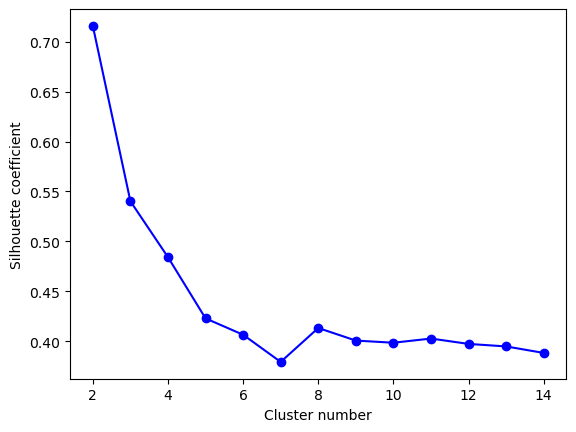

In [46]:
plt.plot(range_n_clusters, s_scores, 'bo-')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

The graph above suggests that the highest silhouette coefficient corresponds to n_cluster = 2. This is in agreement with the dendogram above.

Mean Shift Model :

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth

img = plt.imread('bird_small.png')

dimensions de l'image bird_small.png :  (401, 360, 4)


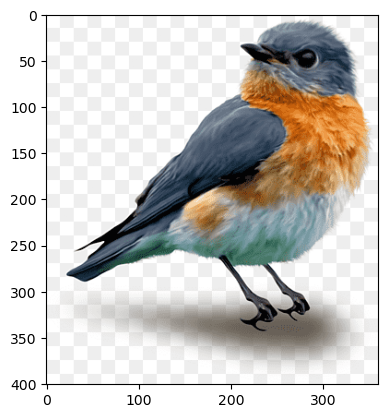

In [7]:
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

plt.figure()
plt.imshow(img)
plt.show()


In [8]:
# Resize image :
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
X.shape

(144360, 4)

The following function trains the Mean Shift algorithm and returns the labels and positions of the centroids :

In [9]:

def get_clusters_centroids(X, quantile, n_samples) :
    bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples)
    cluster = MeanShift(bandwidth = bandwidth)
    cluster.fit(X)
    return cluster.cluster_centers_, cluster.labels_ 


The following function returns the indices of the nearest centroid of each observation of X. (This function may take a few minutes to execute)

In [10]:
def findClosestCentroids(X, centroids) :
    
    idx = []                                     
    K = np.size(centroids, axis=0)              
    
    for i in range(0, np.size(X, axis=0)) :     
        
        norm_val = []                          
        
        for j in range(0, K) :                  
            
            a = ((X[i] - centroids[j])**2).sum() 
            norm_val.append(a)                  
            
        I = norm_val.index(min(norm_val))        
        idx.append(I)                            
        
    return idx

In order to compress the image, the positions of the centroids must be calculated, the pixels grouped together and each pixel assigned to the nearest centroid.
The two functions above meet these needs.

The last compression step consists of replacing the colour vectors of each pixel with those of the nearest centroids

In [11]:
# Calculation of labels and centroid positions
centroids, labels = get_clusters_centroids(X, 0.1, 300)

# Calculation of the indices of the nearest centroid at each element of X
idx = findClosestCentroids(X, centroids)

# Image compression
X_recovered = centroids[idx]

In order to view the constructed image, the compressed image must be resized to the dimensions of the original image

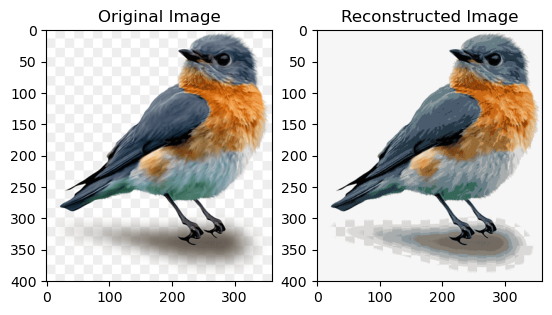

In [12]:
# Resizing the X-matrix
X_recovered = X_recovered.reshape(img.shape[0], img.shape[1], img.shape[2])

# Display of the original and reconstructed images
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(X_recovered)
plt.title('Reconstructed Image')
plt.show()


Evaluation of the algorithm: Compression rate

In [13]:
import imageio
import os

# Recording the reconstructed image
imageio.imwrite('bird_small_recovered.png', X_recovered)

# Size in bytes of the original image
original_size = os.stat('bird_small.png').st_size

# Size in bytes of the reconstructed image
recovered_size = os.stat('bird_small_recovered.png').st_size

# Caclul and display of the compression ratio
compression_rate = round(recovered_size/original_size*100,2)
print('Ratio de compression : ', compression_rate, '%')

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Ratio de compression :  116.93 %
